# Trabalho Final - Mineração de Dados


## Letícia Saraiva Chaves, 402120

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('A_Z Handwritten Data.csv')

In [3]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(372450, 785)

In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [6]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [7]:
X.shape

(372450, 784)

In [8]:
y = y.values.reshape(-1,1)

In [9]:
y.shape

(372450, 1)

### Separando os dados em treino, validação e teste.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=84)

In [12]:
print("Treino: ", X_train.shape)
print("Labels: ", y_train.shape)

print("Teste: ",X_test.shape)
print("Labels: ", y_test.shape)

print("Validação: ",X_val.shape)
print("Labels: ", y_val.shape)

Treino:  (195536, 784)
Labels:  (195536, 1)
Teste:  (111735, 784)
Labels:  (111735, 1)
Validação:  (65179, 784)
Labels:  (65179, 1)


### Plotagem de gráfico e exemplo de imagem do dataset

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25] [ 7281  4551 12289  5320  6006   611  3025  3790   588  4459  2942  6082
  6476  9980 30358 10154  3051  6072 25420 11810 15229  2196  5662  3293
  5701  3190]


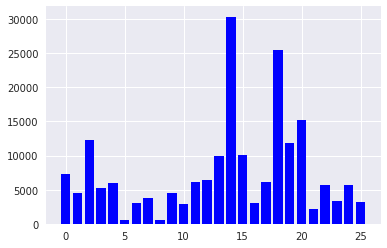

In [14]:
#Plotando a quantidade de imagens para cada label nos dados de treino
names, qtds = np.unique(y_train,return_counts=True)
print(names, qtds)
plt.bar(names, qtds, color='b')
plt.show();

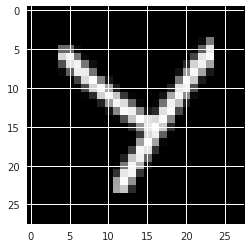

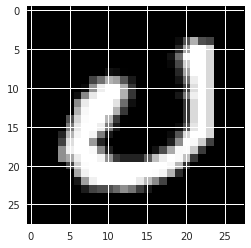

In [15]:
# Imprimindo dois objetos do dataset
plt.imshow(X_train.values[200][0:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

plt.imshow(X_train.values[6239][0:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

### Treinamento com alguns modelos e métricas de classificação

In [26]:
#Decision Tree Classifier
#Escolhendo a melhor profundidade    
for k in range(1,20):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=k, random_state=42)
    dt.fit(X_train,y_train)
    y_ = dt.predict(X_val)
    print('k =', k, ', accuracy =', metrics.accuracy_score(y_val, y_))

k = 1 , accuracy = 0.2540235351877138
k = 2 , accuracy = 0.3130609552156369
k = 3 , accuracy = 0.387133892818239
k = 4 , accuracy = 0.4697525276546127
k = 5 , accuracy = 0.5373509872811795
k = 6 , accuracy = 0.5912640574418141
k = 7 , accuracy = 0.64938093557741
k = 8 , accuracy = 0.7033860599272772
k = 9 , accuracy = 0.7507325979226438
k = 10 , accuracy = 0.7882600223998527
k = 11 , accuracy = 0.8176253087650931
k = 12 , accuracy = 0.8431856886420472
k = 13 , accuracy = 0.8614124181101275
k = 14 , accuracy = 0.8750057533868271
k = 15 , accuracy = 0.8876018349468388
k = 16 , accuracy = 0.8947667193421194
k = 17 , accuracy = 0.89838751745194
k = 18 , accuracy = 0.9033737860353795
k = 19 , accuracy = 0.9062888353610825


In [27]:
#Treinando o classificador
dt = DecisionTreeClassifier(criterion='gini', max_depth=19, random_state=42)
dt.fit(X_train, y_train)
y_ = dt.predict(X_test)

In [16]:
label = list(range(0,26))

### Três métricas de desempenho:

    - Accuracy: Quantas letras rotulamos corretamente de todas as letras?
    
    - Precision: Quantos daqueles que rotulamos como uma letra são realmente aquela letra?
    
    - Recall: De todas as letras, quantas predizemos corretamente?

In [29]:
acuracia = metrics.accuracy_score(y_test, y_)
precisao = metrics.precision_score(y_test, y_, labels=label, average=None)
recall = metrics.recall_score(y_test, y_, labels=label, average=None)

print("Acurácia com DecisionTreeClassifier: ", acuracia)
print("Precisão com DecisionTreeClassifier: ", precisao)
print("Recall com DecisionTreeClassifier: ", recall)

Acurácia com DecisionTreeClassifier:  0.9070389761489238
Precisão com DecisionTreeClassifier:  [0.86478063 0.80994036 0.93063255 0.84120465 0.85375036 0.86643836
 0.80589255 0.80425729 0.85761589 0.85506677 0.80932203 0.91669036
 0.91125107 0.88572403 0.95156889 0.92777683 0.78995157 0.84432181
 0.95659949 0.94904832 0.92985652 0.91626409 0.89938531 0.8552492
 0.87256637 0.87834821]
Recall com DecisionTreeClassifier:  [0.86685893 0.78346154 0.9322227  0.80855263 0.85897436 0.72492837
 0.80682475 0.80277136 0.77083333 0.8543956  0.7953599  0.92750288
 0.86003783 0.91057338 0.96500836 0.93433299 0.74827982 0.83775216
 0.9574556  0.96058091 0.93840496 0.90749601 0.85935085 0.85706695
 0.90791897 0.86341196]


In [30]:
print(metrics.classification_report(y_test, y_, labels=label))

             precision    recall  f1-score   support

          0       0.86      0.87      0.87      4161
          1       0.81      0.78      0.80      2600
          2       0.93      0.93      0.93      7023
          3       0.84      0.81      0.82      3040
          4       0.85      0.86      0.86      3432
          5       0.87      0.72      0.79       349
          6       0.81      0.81      0.81      1729
          7       0.80      0.80      0.80      2165
          8       0.86      0.77      0.81       336
          9       0.86      0.85      0.85      2548
         10       0.81      0.80      0.80      1681
         11       0.92      0.93      0.92      3476
         12       0.91      0.86      0.88      3701
         13       0.89      0.91      0.90      5703
         14       0.95      0.97      0.96     17347
         15       0.93      0.93      0.93      5802
         16       0.79      0.75      0.77      1744
         17       0.84      0.84      0.84   

In [44]:
#Logistic Regression
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42)
clf.fit(X_train, y_train)

y_p = clf.predict(X_test)

In [45]:
acuracia = metrics.accuracy_score(y_test, y_p)
precis = metrics.precision_score(y_test, y_p, labels=label, average=None)
recal = metrics.recall_score(y_test, y_p, labels=label, average=None)

print("Acurácia com LogisticRegression: ", acuracia)
print("Precisão com LogisticRegression: ", precis)
print("Recall com LogisticRegression: ", recal)

Acurácia com LogisticRegression:  0.8771557703494877
Precisão com LogisticRegression:  [0.83815166 0.86179541 0.90770338 0.8367274  0.82913669 0.84117647
 0.83912484 0.76263108 0.90508475 0.77464789 0.7622093  0.91571627
 0.87340426 0.81200632 0.92317873 0.90442177 0.84793814 0.78979771
 0.92963826 0.92563802 0.87048091 0.87114198 0.81710442 0.83067941
 0.8263528  0.88753623]
Recall com LogisticRegression:  [0.85003605 0.79384615 0.8976221  0.77039474 0.80594406 0.81948424
 0.75419318 0.73903002 0.79464286 0.73390895 0.77989292 0.94706559
 0.88732775 0.81115203 0.96500836 0.91658049 0.75458716 0.77636888
 0.93411813 0.93524007 0.88818662 0.90031898 0.7885626  0.83156217
 0.82965009 0.83982447]


In [46]:
print(metrics.classification_report(y_test, y_p, labels=label))

             precision    recall  f1-score   support

          0       0.84      0.85      0.84      4161
          1       0.86      0.79      0.83      2600
          2       0.91      0.90      0.90      7023
          3       0.84      0.77      0.80      3040
          4       0.83      0.81      0.82      3432
          5       0.84      0.82      0.83       349
          6       0.84      0.75      0.79      1729
          7       0.76      0.74      0.75      2165
          8       0.91      0.79      0.85       336
          9       0.77      0.73      0.75      2548
         10       0.76      0.78      0.77      1681
         11       0.92      0.95      0.93      3476
         12       0.87      0.89      0.88      3701
         13       0.81      0.81      0.81      5703
         14       0.92      0.97      0.94     17347
         15       0.90      0.92      0.91      5802
         16       0.85      0.75      0.80      1744
         17       0.79      0.78      0.78   

In [13]:
#Random Forest Classifier
#Escolhendo a melhor profundidade
for k in range(1,20):
    clf = RandomForestClassifier(n_estimators=100, max_depth=k, random_state=42)
    clf.fit(X_train, y_train)  
    y_pr = clf.predict(X_val)
    print('k =', k, ', accuracy =', metrics.accuracy_score(y_val, y_pr))

k = 1 , accuracy = 0.25919391214961873
k = 2 , accuracy = 0.3400788597554427
k = 3 , accuracy = 0.4819803924576934
k = 4 , accuracy = 0.5691863943908314
k = 5 , accuracy = 0.635987051044048
k = 6 , accuracy = 0.7119777842556652
k = 7 , accuracy = 0.7758633915831786
k = 8 , accuracy = 0.8244986882278035
k = 9 , accuracy = 0.8637291152058179
k = 10 , accuracy = 0.8944138449500606
k = 11 , accuracy = 0.918976971110327
k = 12 , accuracy = 0.9355927522668344
k = 13 , accuracy = 0.9492627993678946
k = 14 , accuracy = 0.9584375335614231
k = 15 , accuracy = 0.9633777750502462
k = 16 , accuracy = 0.9680111692416269
k = 17 , accuracy = 0.9694686939044784
k = 18 , accuracy = 0.9715399131622148
k = 19 , accuracy = 0.9719694993786342


In [14]:
clf = RandomForestClassifier(n_estimators=100, max_depth=19, random_state=42)
clf.fit(X_train, y_train)  

y_pre = clf.predict(X_test)

In [17]:
acuracia = metrics.accuracy_score(y_test, y_pre)
prec = metrics.precision_score(y_test, y_pre, labels=label, average=None)
rec = metrics.recall_score(y_test, y_pre, labels=label, average=None)

print("Acurácia com RandomForestClassifier: ", acuracia)
print("Precisão com RandomForestClassifier: ", prec)
print("Recall com RandomForestClassifier: ", rec)

Acurácia com RandomForestClassifier:  0.9732402559627691
Precisão com RandomForestClassifier:  [0.94908586 0.98083832 0.97999716 0.96387233 0.97828027 0.99085366
 0.9797048  0.96146435 1.         0.96872461 0.96644295 0.976
 0.97350451 0.95055413 0.96902878 0.97212307 0.97702616 0.96640374
 0.98504201 0.98368607 0.97401566 0.98473896 0.98256377 0.98096792
 0.95945122 0.98922292]
Recall com RandomForestClassifier:  [0.98558039 0.945      0.98362523 0.90394737 0.95804196 0.93123209
 0.92134182 0.92193995 0.93154762 0.93602826 0.94229625 0.98273878
 0.96298298 0.97755567 0.99561884 0.98569459 0.87786697 0.95331412
 0.99284042 0.99184944 0.9864399  0.97767145 0.94064915 0.95855473
 0.96593002 0.95666484]


In [18]:
print(metrics.classification_report(y_test, y_pre, labels=label))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      4161
          1       0.98      0.94      0.96      2600
          2       0.98      0.98      0.98      7023
          3       0.96      0.90      0.93      3040
          4       0.98      0.96      0.97      3432
          5       0.99      0.93      0.96       349
          6       0.98      0.92      0.95      1729
          7       0.96      0.92      0.94      2165
          8       1.00      0.93      0.96       336
          9       0.97      0.94      0.95      2548
         10       0.97      0.94      0.95      1681
         11       0.98      0.98      0.98      3476
         12       0.97      0.96      0.97      3701
         13       0.95      0.98      0.96      5703
         14       0.97      1.00      0.98     17347
         15       0.97      0.99      0.98      5802
         16       0.98      0.88      0.92      1744
         17       0.97      0.95      0.96   

In [ ]:
#!conda install -y pydot==1.2.3 

In [ ]:
#!conda install -y graphviz

In [7]:
#!conda update -n base -c defaults conda -y

In [8]:
#!conda install -y keras

In [29]:
#!pip install keras-metrics

In [67]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import precision_score, recall_score
import keras

### Multilayer Perceptron


##### Criando o modelo

In [20]:
model = Sequential()
model.add(Dense(4, input_dim=784, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(14, init='uniform', activation='relu'))
model.add(Dense(17, init='uniform', activation='relu'))
model.add(Dense(21, init='uniform', activation='relu'))
model.add(Dense(26, init='uniform', activation='softmax'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 14)                154       
_________________________________________________________________
dense_5 (Dense)              (None, 17)                255       
_________________________________________________________________
dense_6 (Dense)              (None, 21)                378       
_________________________________________________________________
dense_7 (Dense)              (None, 26)                572       
Total para

##### Compilando o modelo

In [49]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

##### Fit do modelo

In [50]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
                             save_best_only=True, mode='auto', period=1)

history = model.fit(X_train, y_train, nb_epoch=100, batch_size=180, verbose=1,
                    validation_data=(X_val, y_val), callbacks=[checkpoint], shuffle=True)

Train on 195536 samples, validate on 65179 samples
Epoch 1/100
195536/195536 [==============================] - 14s 71us/step - loss: 0.9732 - acc: 0.7060 - val_loss: 0.9741 - val_acc: 0.7130

Epoch 00001: loss improved from inf to 0.97317, saving model to best_model.hdf5
Epoch 2/100
195536/195536 [==============================] - 13s 69us/step - loss: 0.9692 - acc: 0.7091 - val_loss: 0.9853 - val_acc: 0.7037

Epoch 00002: loss improved from 0.97317 to 0.96924, saving model to best_model.hdf5
Epoch 3/100
195536/195536 [==============================] - 13s 65us/step - loss: 0.9604 - acc: 0.7123 - val_loss: 0.9725 - val_acc: 0.7120

Epoch 00003: loss improved from 0.96924 to 0.96037, saving model to best_model.hdf5
Epoch 4/100
195536/195536 [==============================] - 13s 66us/step - loss: 0.9581 - acc: 0.7137 - val_loss: 0.9635 - val_acc: 0.7122

Epoch 00004: loss improved from 0.96037 to 0.95813, saving model to best_model.hdf5
Epoch 5/100
195536/195536 [======================

195536/195536 [==============================] - 13s 68us/step - loss: 0.8473 - acc: 0.7464 - val_loss: 0.8587 - val_acc: 0.7444

Epoch 00077: loss did not improve
Epoch 78/100
195536/195536 [==============================] - 13s 68us/step - loss: 0.8472 - acc: 0.7460 - val_loss: 0.8563 - val_acc: 0.7461

Epoch 00078: loss improved from 0.84728 to 0.84720, saving model to best_model.hdf5
Epoch 79/100
195536/195536 [==============================] - 13s 68us/step - loss: 0.8457 - acc: 0.7470 - val_loss: 0.8791 - val_acc: 0.7377

Epoch 00079: loss improved from 0.84720 to 0.84571, saving model to best_model.hdf5
Epoch 80/100
195536/195536 [==============================] - 13s 65us/step - loss: 0.8453 - acc: 0.7476 - val_loss: 0.8807 - val_acc: 0.7384

Epoch 00080: loss improved from 0.84571 to 0.84530, saving model to best_model.hdf5
Epoch 81/100
195536/195536 [==============================] - 13s 65us/step - loss: 0.8463 - acc: 0.7467 - val_loss: 0.8770 - val_acc: 0.7364

Epoch 00081:

In [51]:
print(history.history.keys())

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


##### Avaliando o modelo

In [52]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

111735/111735 [==============================] - 6s 50us/step
acc: 75.00%


In [55]:
y_ = model.predict(X_test)

In [65]:
y_pred = np.argmax(y_,axis=1).reshape(-1,1)

In [66]:
y_pred.shape

(111735, 1)

In [69]:
prec = precision_score(y_test, y_pred, average=None)
rec = recall_score(y_test, y_pred, average=None)

In [73]:
print("Accuracy com MLP: ", scores[1])
print("Precision com MLP: ", prec)
print("Recall com MPL: ", rec)

Accuracy com MLP:  0.7499888128144376
Precision com MLP:  [0.53525358 0.5062274  0.8517807  0.5827674  0.74095306 0.66321244
 0.54656999 0.50038551 0.49418605 0.71946565 0.68192581 0.78205128
 0.78524769 0.5636236  0.881662   0.83834252 0.38490566 0.59532967
 0.91998288 0.89078698 0.6464476  0.46473029 0.63038549 0.74330709
 0.6962536  0.72812683]
Recall com MPL:  [0.72795001 0.48461538 0.82073188 0.45164474 0.6025641  0.36676218
 0.56680162 0.29976905 0.25297619 0.44387755 0.51397977 0.89499425
 0.77951905 0.70366474 0.92598144 0.81247846 0.05848624 0.62449568
 0.88806278 0.90411974 0.83647437 0.53588517 0.42967543 0.75239107
 0.74155924 0.68019748]


In [74]:
print("Média Precision com MLP: ", np.mean(prec))
print("Média Recall com MPL: ", np.mean(rec))

Média Precision com MLP:  0.6682273371612897
Média Recall com MPL:  0.6192176001163072


##### Plotando gráficos

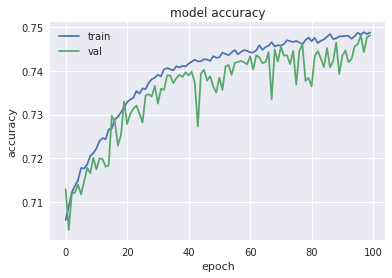

In [88]:
#Gráfico acurácia
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

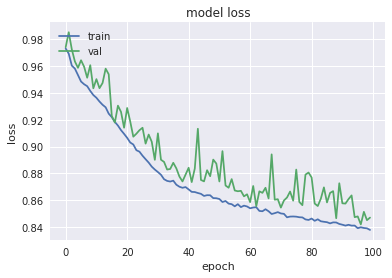

In [89]:
#Gráfico loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Convolutional Neural Network

##### Criando o modelo

In [75]:
#Instancia a rede
cnn = Sequential()

#Camada de convolução
cnn.add(Conv2D(32, (5,5), input_shape=(28, 28, 1), activation = 'relu'))

#Normaliza os feature
cnn.add(BatchNormalization())

#camada de pooling
cnn.add(MaxPooling2D(pool_size = (2,2)))

#Novas camadas de convolução e pooling
cnn.add(Conv2D(32, (5,5), activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size = (2,2)))

#Camada de flattening
cnn.add(Flatten())

#Primeira camada oculta
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(0.2))

#Segunda camada oculta
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(0.2))

#Camada de saida
cnn.add(Dense(26, activation = 'softmax'))

In [76]:
#Reshape
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_val = X_val.values.reshape(X_val.shape[0], 28, 28, 1).astype('float32')

In [77]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 32)          128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

##### Compilando o modelo

In [78]:
#Compila a rede
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

##### Fit do modelo

In [79]:
hist = cnn.fit(X_train, y_train, epochs=4, batch_size=130,
               validation_data=(X_val, y_val), verbose=1)

Train on 195536 samples, validate on 65179 samples
Epoch 1/4
195536/195536 [==============================] - 695s 4ms/step - loss: 0.2269 - acc: 0.9360 - val_loss: 0.0736 - val_acc: 0.9790
Epoch 2/4
195536/195536 [==============================] - 694s 4ms/step - loss: 0.0816 - acc: 0.9773 - val_loss: 0.0716 - val_acc: 0.9794
Epoch 3/4
195536/195536 [==============================] - 693s 4ms/step - loss: 0.0656 - acc: 0.9819 - val_loss: 0.0550 - val_acc: 0.9846
Epoch 4/4
195536/195536 [==============================] - 684s 3ms/step - loss: 0.0532 - acc: 0.9851 - val_loss: 0.0477 - val_acc: 0.9866


##### Avaliando o modelo

In [80]:
resultado = cnn.evaluate(X_test, y_test)
print("%s: %.2f%%" % (cnn.metrics_names[1], resultado[1]*100))

111735/111735 [==============================] - 155s 1ms/step
acc: 98.71%


In [82]:
y_n = cnn.predict(X_test)

In [83]:
y_n.shape

(111735, 26)

In [84]:
y_pred_n = np.argmax(y_n, axis=1).reshape(-1,1)

In [85]:
prec_n = precision_score(y_test, y_pred_n, average=None)
rec_n = recall_score(y_test, y_pred_n, average=None)

In [86]:
print("Accuracy com CNN: ", resultado[1])
print("Precision com CNN: ", prec_n)
print("Recall com CNN: ", rec_n)

Accuracy com CNN:  0.9871392133172238
Precision com CNN:  [0.98803828 0.9892017  0.99354376 0.93156733 0.98721302 0.97714286
 0.98927294 0.95899054 0.97360704 0.971875   0.97178131 0.97342381
 0.98870664 0.98717949 0.99482498 0.9944675  0.98707403 0.98333333
 0.99655647 0.99129922 0.9911321  0.95402299 0.98840489 0.99291939
 0.97977321 0.98095756]
Recall com CNN:  [0.99254987 0.98653846 0.98604585 0.97171053 0.98980186 0.97994269
 0.96009254 0.98290993 0.98809524 0.97645212 0.98334325 0.99050633
 0.99351527 0.9856216  0.98628005 0.99138228 0.96330275 0.98616715
 0.99614484 0.99614701 0.98896805 0.99282297 0.97496136 0.96865037
 0.98127686 0.98902907]


In [87]:
print("Média Precision com CNN: ", np.mean(prec_n))
print("Média Recall com CNN: ", np.mean(rec_n))

Média Precision com CNN:  0.9813965142601769
Média Recall com CNN:  0.9839330114661965


##### Plotando gráficos

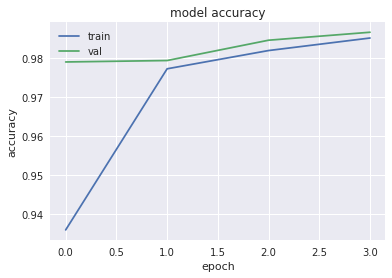

In [90]:
#Gráfico acurácia
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

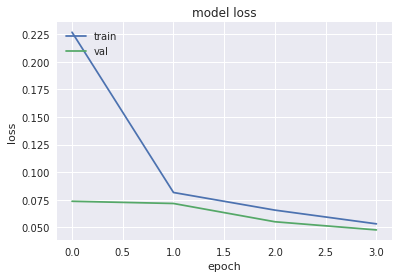

In [91]:
#Gráfico loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Resultados

#### Decision Tree Classifier 
Acurácia com DecisionTreeClassifier:  0.9070389761489238

Precisão com DecisionTreeClassifier: 0.91 (média total)
 
Recall com DecisionTreeClassifier: 0.91 (média total)
 
#### Logistic Regression
Acurácia com LogisticRegression:  0.8771557703494877

Precisão com LogisticRegression: 0.88 (média total)

Recall com LogisticRegression: 0.88 (média total)

#### Random Forest Classifier
Acurácia com RandomForestClassifier:  0.9732402559627691

Precisão com RandomForestClassifier: 0.97 (média total)

Recall com RandomForestClassifier: 0.97 (média total)

#### Multilayer Perceptron
Acurácia com MLP: 0.7499888128144376

Precisão com MLP:  0.6682273371612897 (média total)

Recall com MPL:  0.6192176001163072 (média total)

#### Convolutional Neural Network
Acurácia com CNN: 0.9871392133172238

Precisão com CNN:  0.9813965142601769 (média total)

Recall com CNN:  0.9839330114661965 (média total)